In [210]:
import keras
from keras import Model
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def preprocess_data():
    n_out=10

    (x_train,y_train),(x_test,y_test)=mnist.load_data()

    x_train=x_train/255.
    x_test=x_test/255.

    #one-hot encoding
    y_train = keras.utils.np_utils.to_categorical(y_train, n_out)
    y_test = keras.utils.np_utils.to_categorical(y_test, n_out)

    x_train = np.expand_dims(x_train, axis=3)
    x_test = np.expand_dims(x_test, axis=3)

    #print(x_train.shape, y_train.shape,x_test.shape,y_test.shape)
    
    return x_train,y_train,x_test,y_test

x_train,y_train,x_test,y_test=preprocess_data()

In [157]:
def train_cnn_once(filters=[10],kernel_size=[3],dense=10,n_eps=20):
    
    cnn=Sequential()
    
    for i in range(len(filters)):
        cnn.add(Conv2D(filters=filters[i],kernel_size=(kernel_size[i],kernel_size[i]),activation='relu',input_shape=(28,28,1)))
        cnn.add(MaxPooling2D((2,2)))
        
    cnn.add(Flatten())
    cnn.add(Dense(dense,activation='relu'))
    cnn.add(Dense(10,activation='softmax'))                   
    #cnn.summary()
    
    cnn.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['categorical_accuracy'])
    
    traj=cnn.fit(x_train,y_train,epochs=n_eps,batch_size=32,verbose=0,shuffle=True,validation_data=(x_test, y_test))
    
    return cnn, traj

#train_cnn_once(filters=[10,10,10],kernel_size=[3,3,3],dense=10,n_eps=20)
#train_cnn_once(filters=[10,10],kernel_size=[3,3],dense=10,n_eps=20)
#train_cnn_once(filters=[10],kernel_size=[3],dense=10,n_eps=20)

def scan(layers=1,filter_size_list=[10,20,50],dense_size_list=[10,20,50],kernel_size_list=[3]):
    trajs={}
    models={}
    
    for f in filter_size_list:
        for d in dense_size_list:
            for k in kernel_size_list:
                print(str(f)+'_'+str(d)+'_'+str(k))
                models[str(f)+'_'+str(d)+'_'+str(k)],trajs[str(f)+'_'+str(d)+'_'+str(k)]=train_cnn_once(filters=[f]*layers,kernel_size=[k]*layers,dense=d)
            
    return models,trajs


In [134]:
models_1l,trajs_1l=scan(layers=1,filter_size_list=[10,20,50],dense_size_list=[10,20,50])

10_10
10_20
10_50
20_10
20_20
20_50
50_10
50_20
50_50


In [148]:
models_2l,trajs_2l=scan(layers=2,filter_size_list=[10,20,50],dense_size_list=[10,20,50])

10_10
10_20
10_50
20_10
20_20
20_50
50_10
50_20
50_50


In [159]:
models_2l_k,trajs_2l_k=scan(layers=2,filter_size_list=[50],dense_size_list=[50],kernel_size_list=[2,3,4,5])

50_50_2
50_50_3
50_50_4
50_50_5


In [139]:
trajs_sub = {k:trajs_1l[k] for k in [k for k in trajs_1l.keys() if '10_' in k]}
trajs_sub



{'10_10': <keras.callbacks.History at 0x32f19cc70>,
 '10_20': <keras.callbacks.History at 0x331ebcbe0>,
 '10_50': <keras.callbacks.History at 0x3859ee850>}

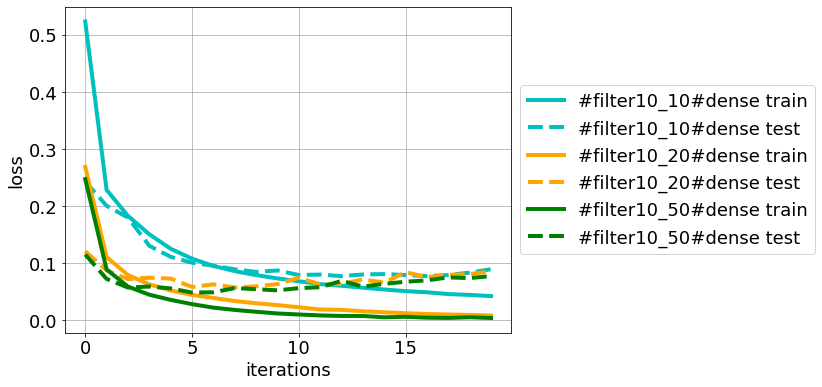

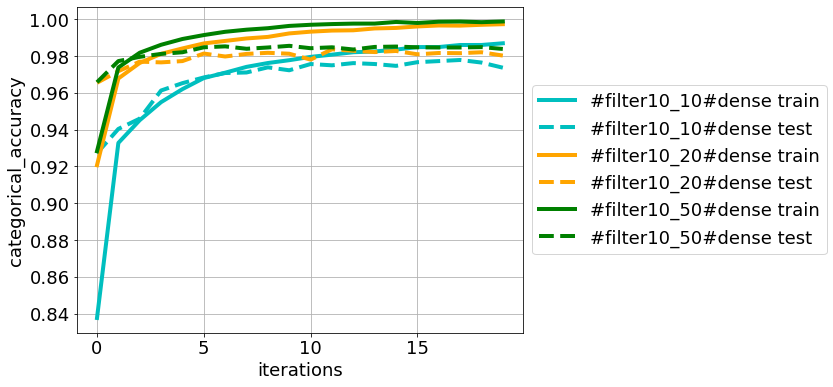

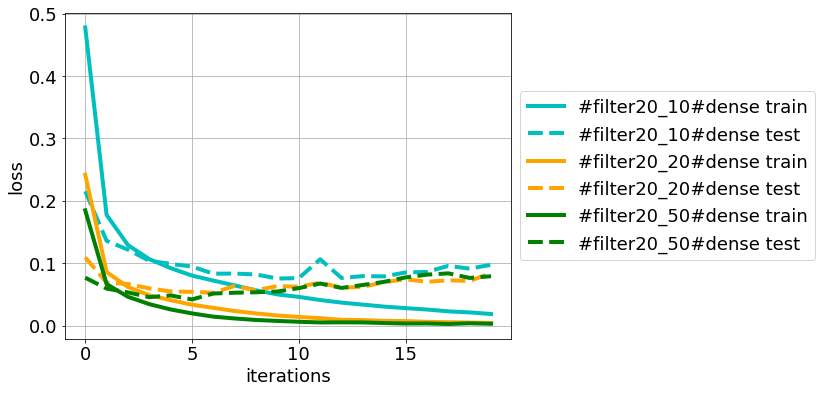

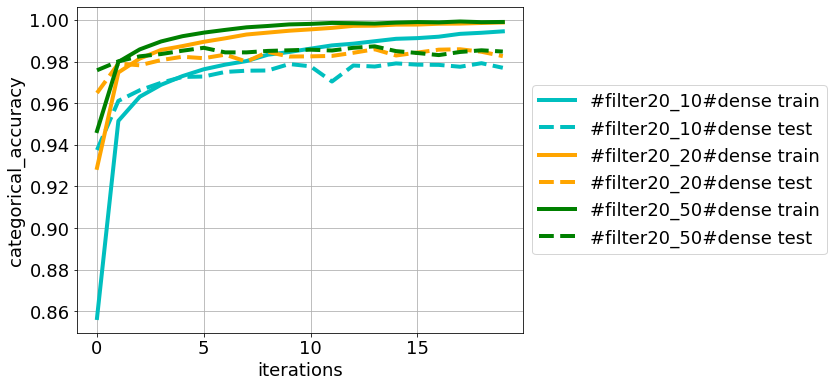

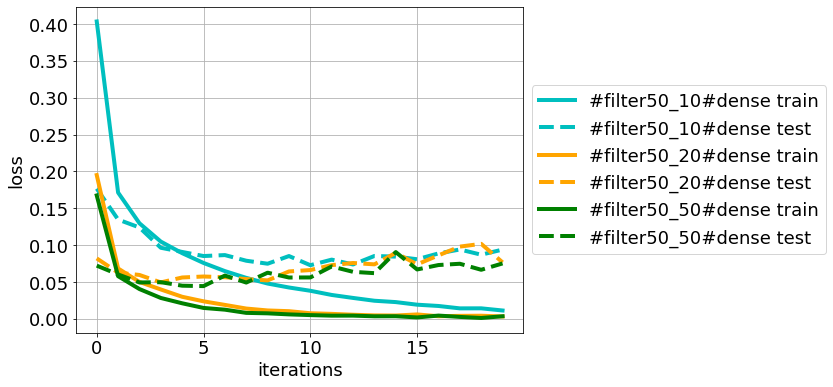

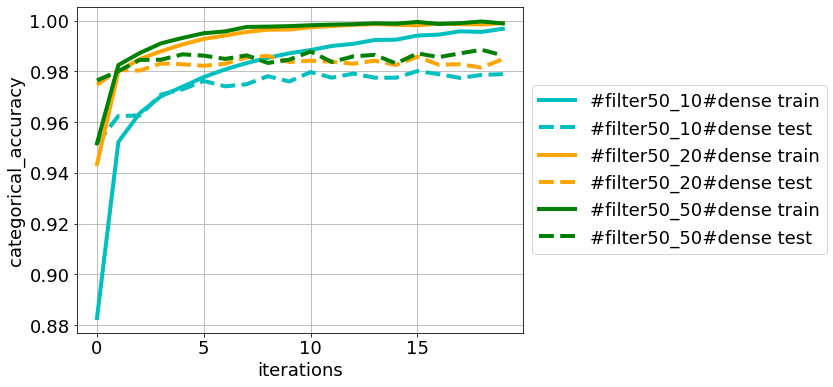

In [151]:
def plot_traj_history(trajs,mark='loss',filter_or_dense='3_'):

    plt.rcParams['font.size']='18'
    plt.figure(figsize=(8,6))
    colors=['c','orange','g','r','y','m']
    
    sub=[k for k in trajs.keys() if filter_or_dense in k]
    trajs_sub={k:trajs[k] for k in sub}
    
    for i,(k,v) in enumerate(trajs_sub.items()):
        
        plt.plot(v.history[mark],color=colors[i],label='#filter'+k+'#dense train',linewidth=4)
        plt.plot(v.history['val_'+mark],color=colors[i],linestyle='--',label='#filter'+k+'#dense test',linewidth=4)
        
            
    plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
    plt.xlabel('iterations')
    plt.ylabel(mark)
    plt.grid()
    plt.savefig('mnist_nn_filter_dense_'+filter_or_dense+mark+'_compare.png',dpi=350,bbox_inches='tight')
    
for fd in ['10_','20_','50_']:
    plot_traj_history(trajs_1l,mark='loss',filter_or_dense=fd)
    plot_traj_history(trajs_1l,mark='categorical_accuracy',filter_or_dense=fd)


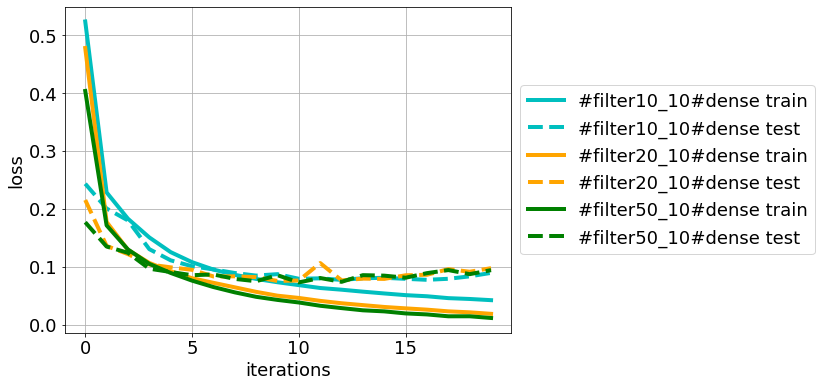

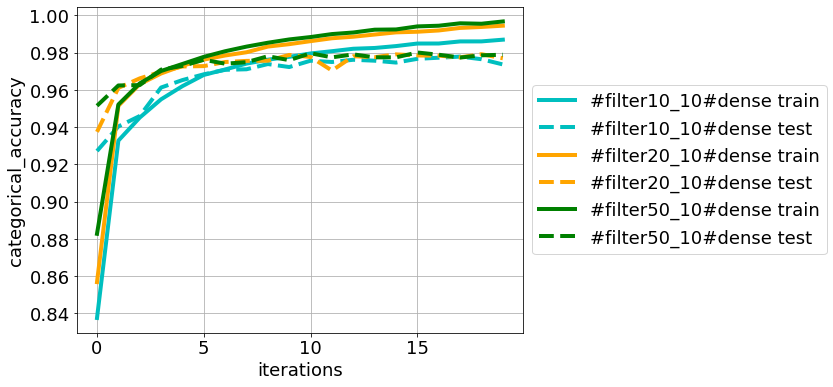

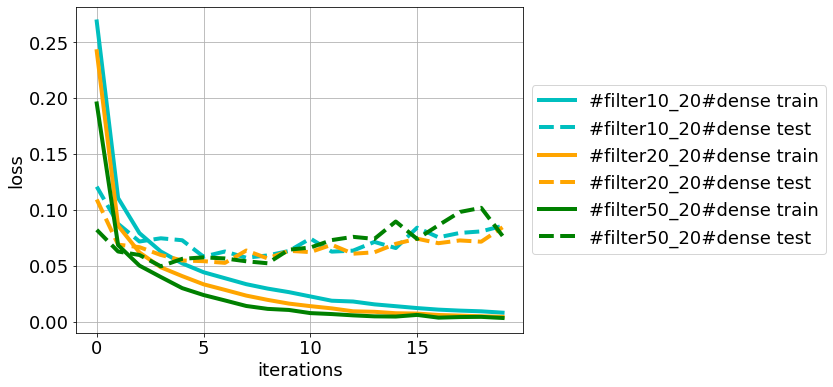

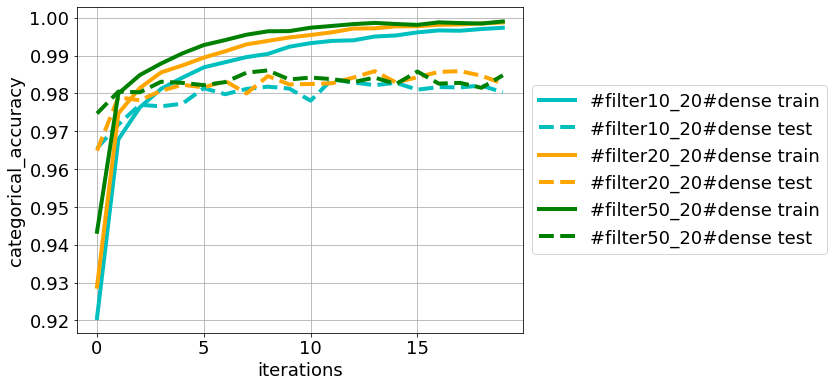

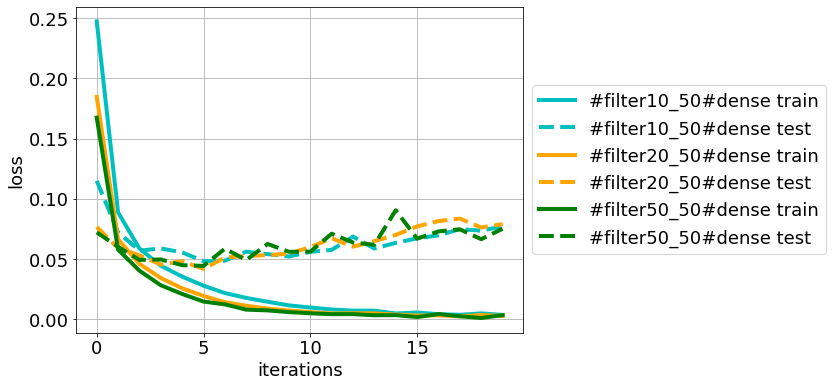

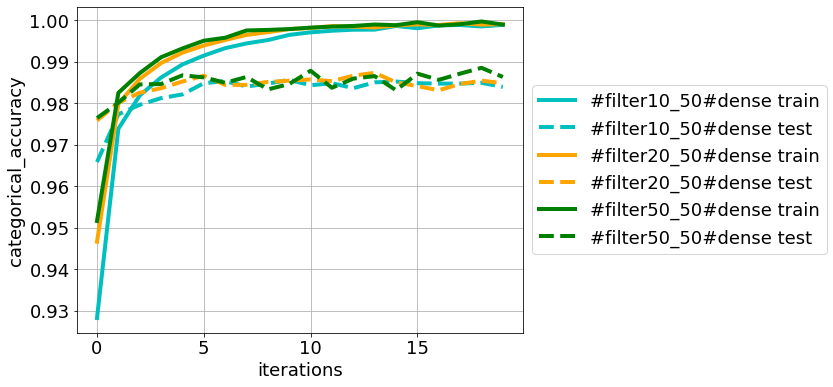

In [152]:
for fd in ['_10','_20','_50']:

    plot_traj_history(trajs_1l,mark='loss',filter_or_dense=fd)
    plot_traj_history(trajs_1l,mark='categorical_accuracy',filter_or_dense=fd)
    

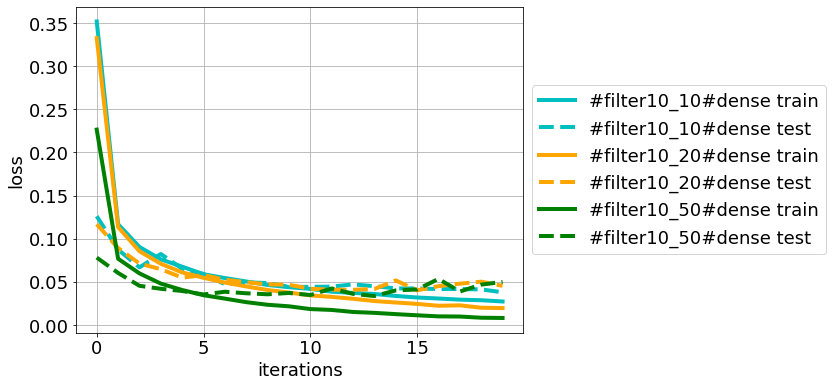

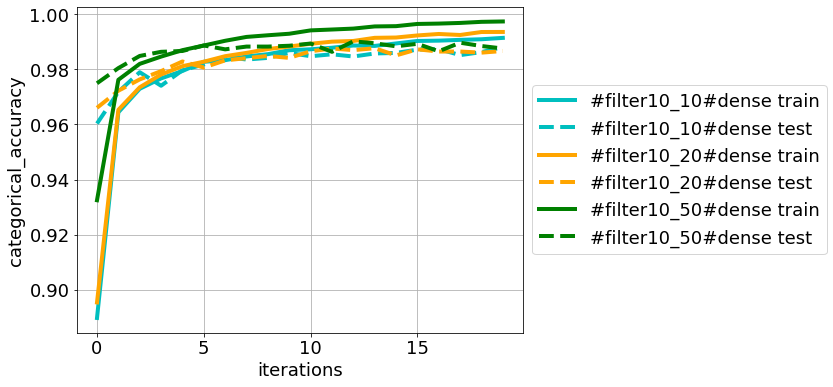

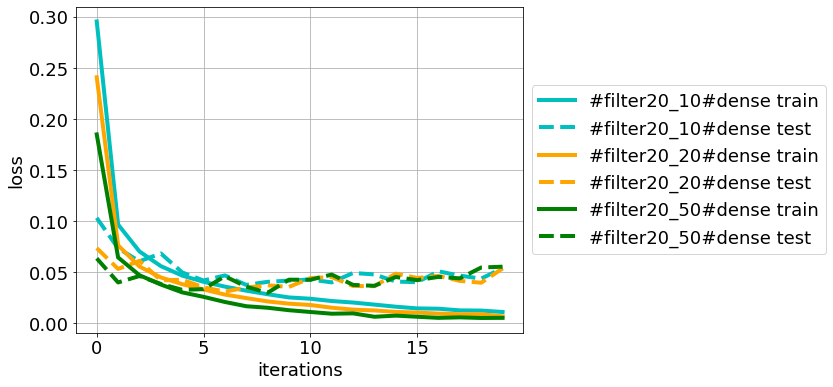

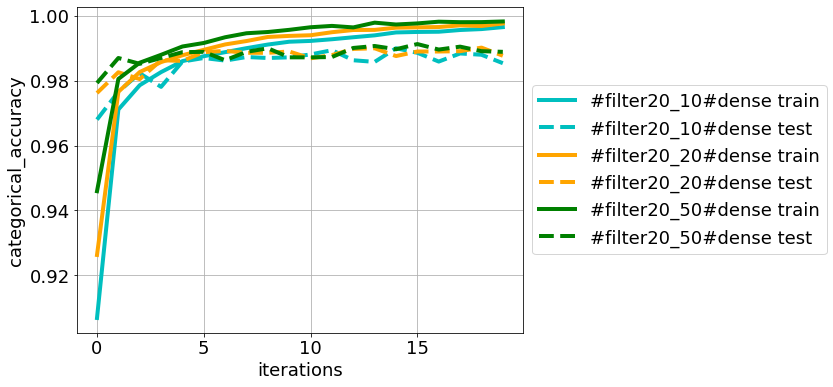

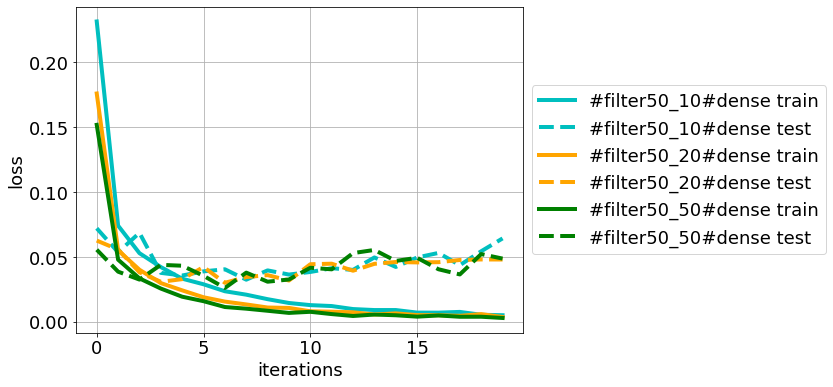

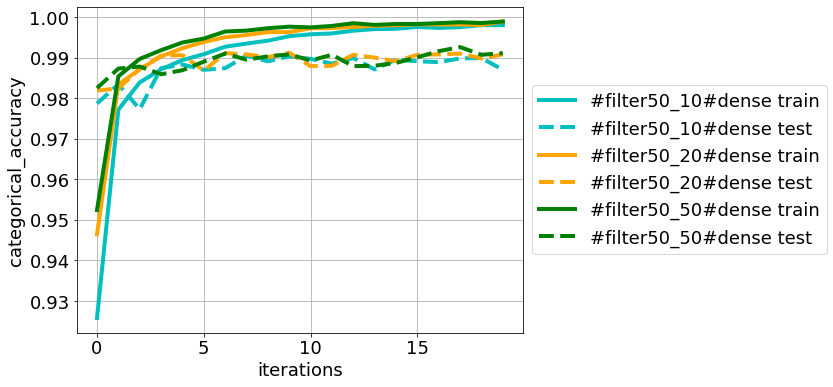

In [153]:
for fd in ['10_','20_','50_']:
    plot_traj_history(trajs_2l,mark='loss',filter_or_dense=fd)
    plot_traj_history(trajs_2l,mark='categorical_accuracy',filter_or_dense=fd)

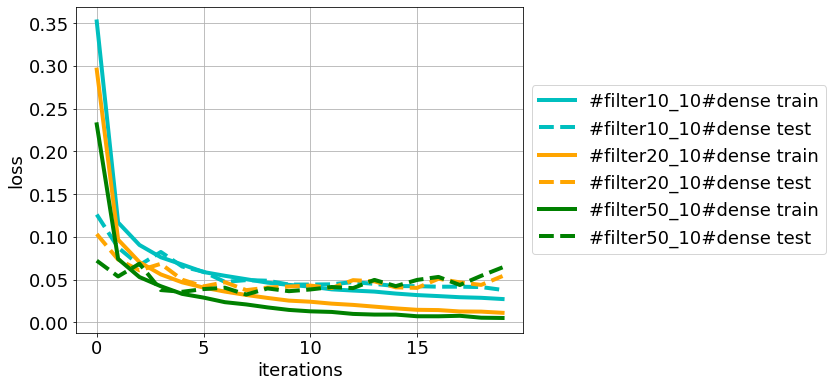

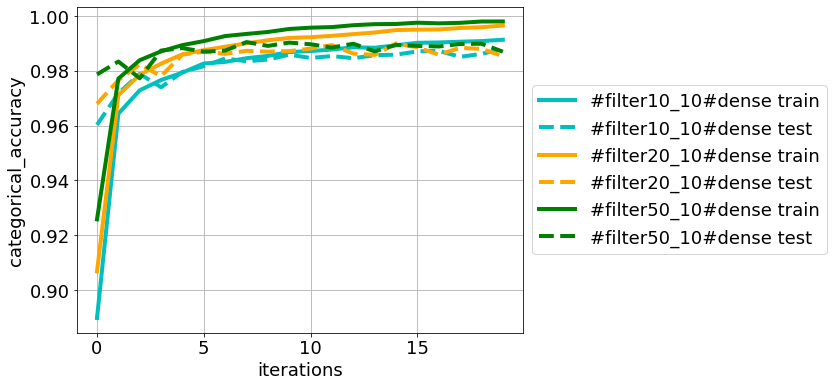

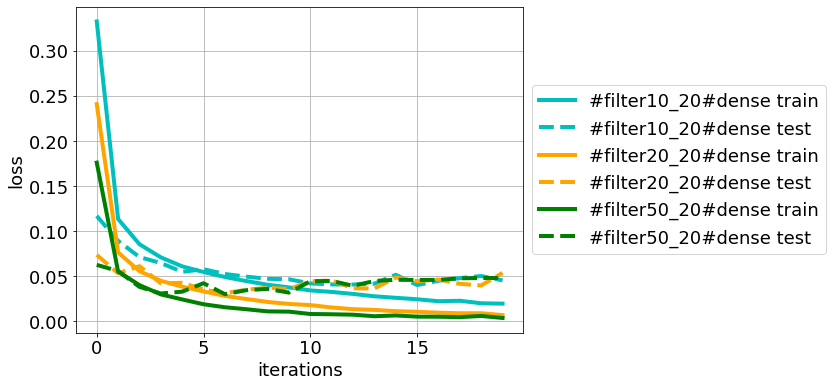

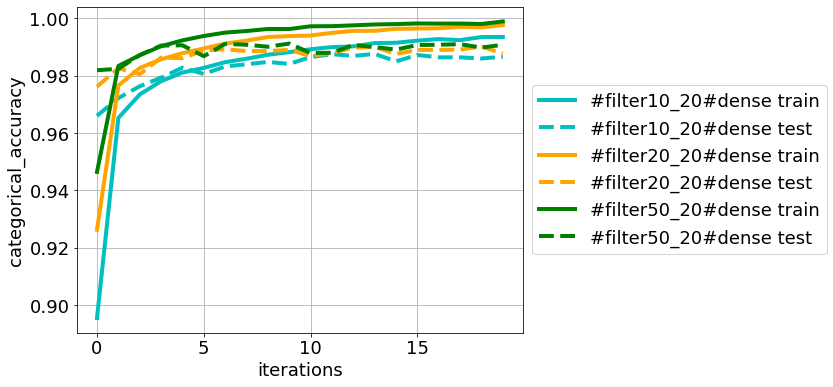

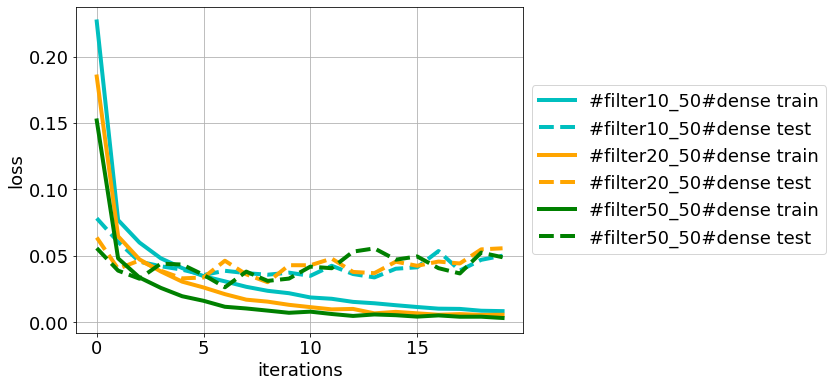

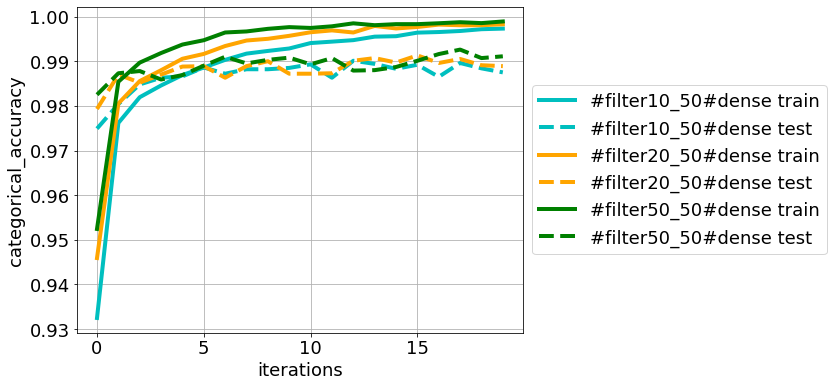

In [155]:
for fd in ['_10','_20','_50']:

    plot_traj_history(trajs_2l,mark='loss',filter_or_dense=fd)
    plot_traj_history(trajs_2l,mark='categorical_accuracy',filter_or_dense=fd)

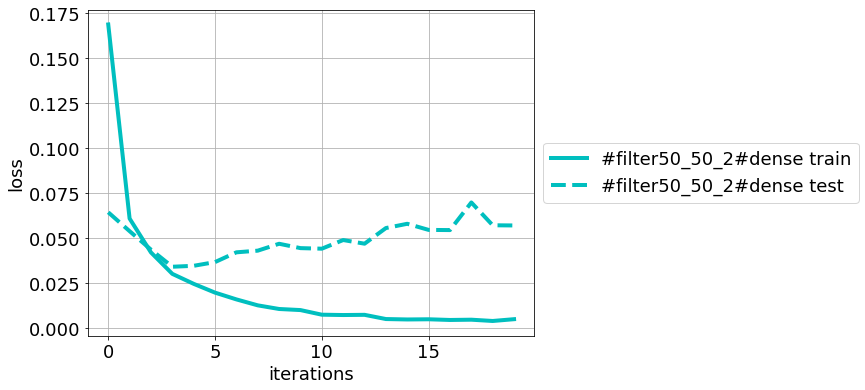

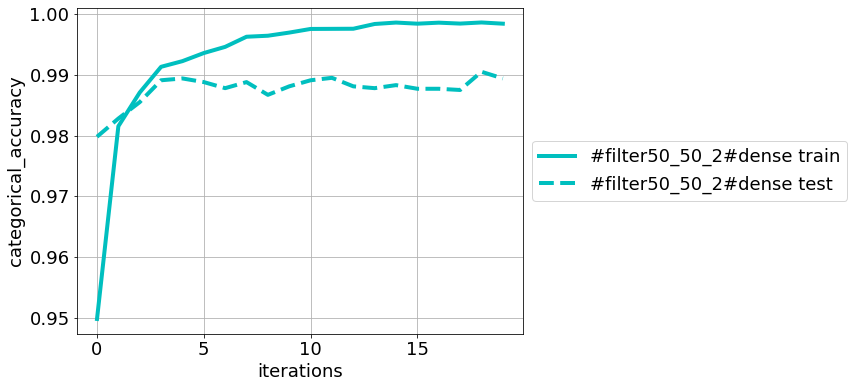

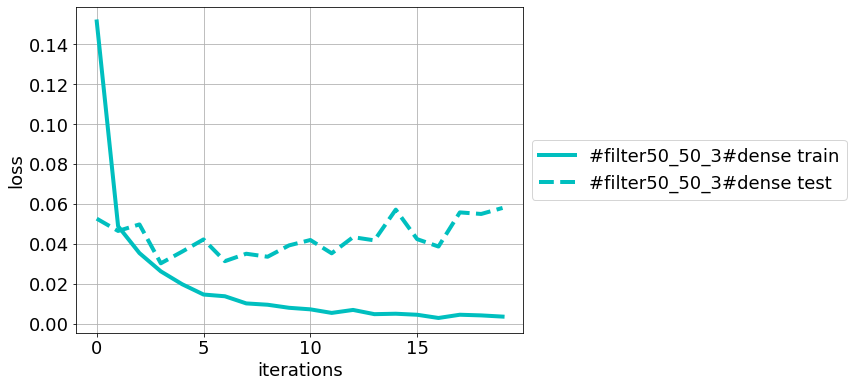

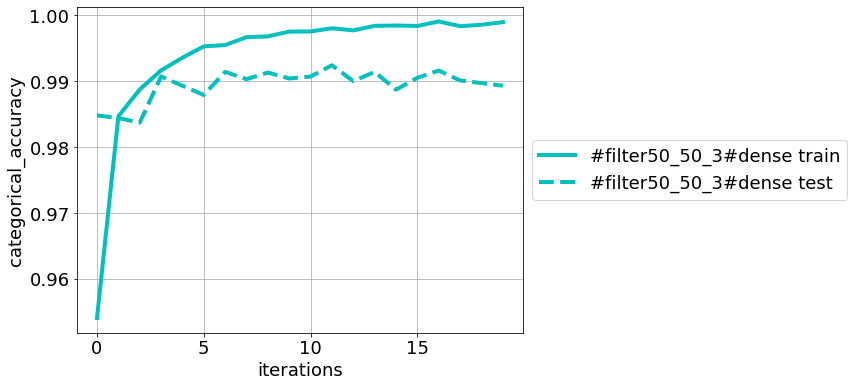

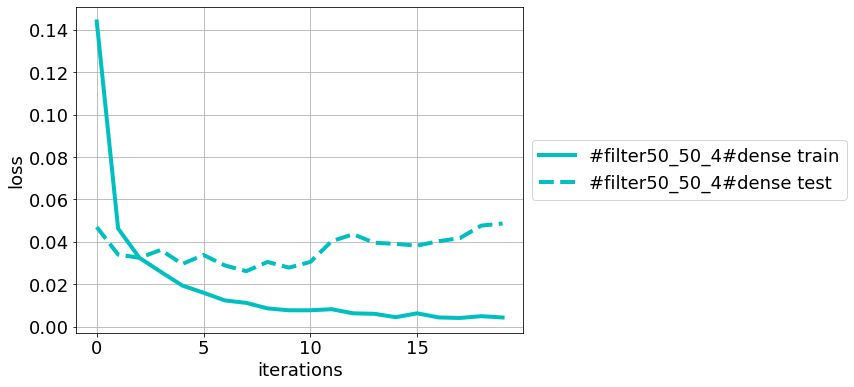

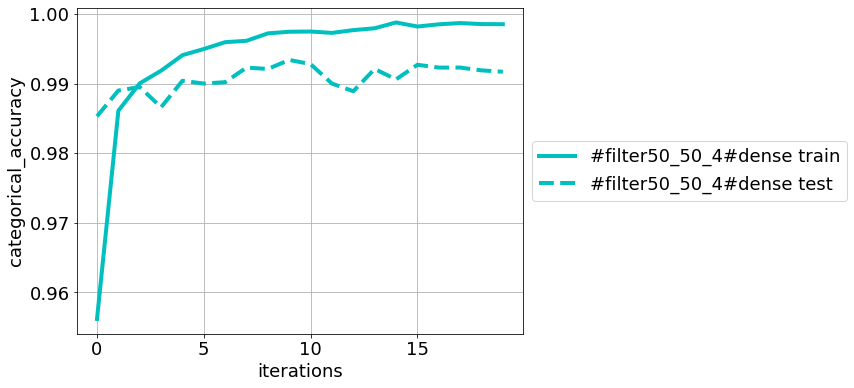

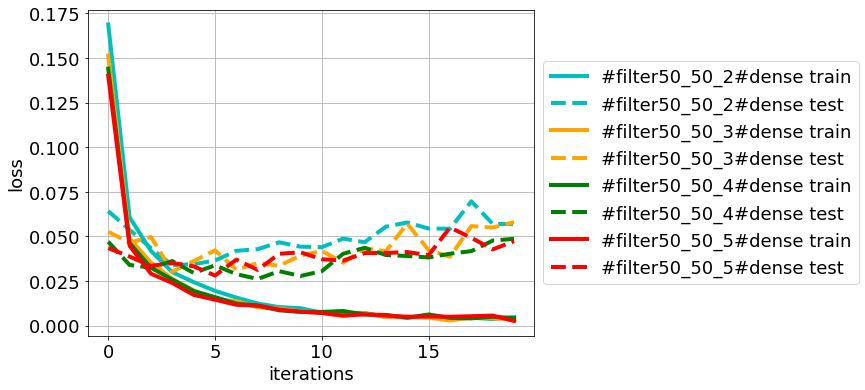

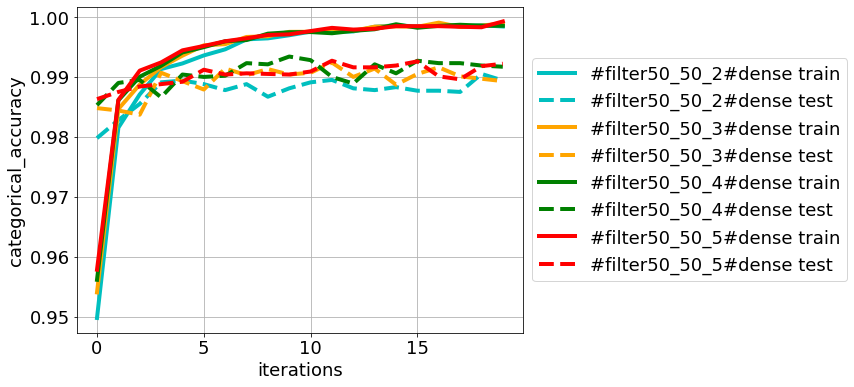

In [162]:
for fd in ['_2','_3','_4','_5']:
    plot_traj_history(trajs_2l_k,mark='loss',filter_or_dense=fd)
    plot_traj_history(trajs_2l_k,mark='categorical_accuracy',filter_or_dense=fd)


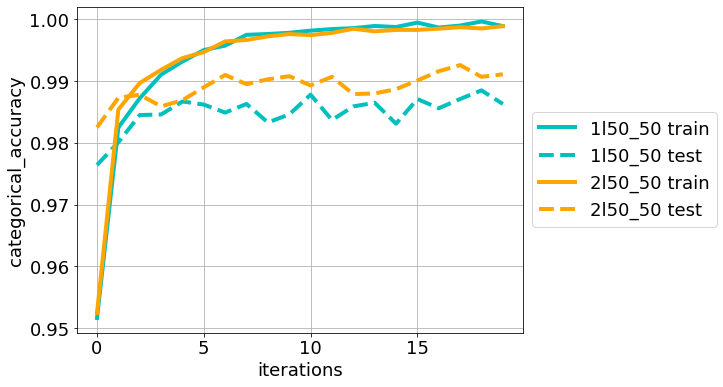

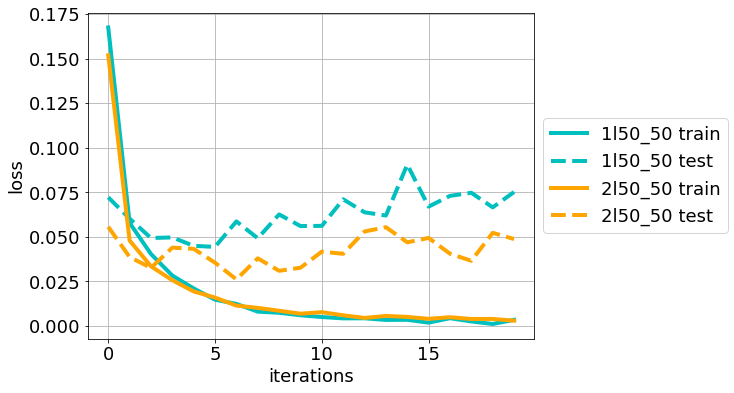

In [156]:
def plot_sel(key='20_50',mark='categorical_accuracy'):

    plt.rcParams['font.size']='18'
    plt.rcParams['lines.linewidth']='4'
    plt.figure(figsize=(8,6))
    colors=['c','orange','g','r','y','m']

    plt.plot(trajs_1l[key].history[mark],color=colors[0],label='1l'+key+' train')
    plt.plot(trajs_1l[key].history['val_'+mark],color=colors[0],linestyle='--',label='1l'+key+' test')
    plt.plot(trajs_2l[key].history[mark],color=colors[1],label='2l'+key+' train')
    plt.plot(trajs_2l[key].history['val_'+mark],color=colors[1],linestyle='--',label='2l'+key+' test')
    #plt.plot(trajs_3l[key].history[mark],color=colors[2],label='3l'+key+' train')
    #plt.plot(trajs_3l[key].history['val_'+mark],color=colors[2],linestyle='--',label='3l'+key+' test')

    plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
    plt.xlabel('iterations')
    plt.ylabel(mark)
    plt.grid()
    plt.savefig('mnist_nn_filter_dense_'+mark+'_compare.png',dpi=350,bbox_inches='tight')
    
plot_sel(key='50_50',mark='categorical_accuracy')
plot_sel(key='50_50',mark='loss')

In [170]:
models_1l['10_10'].summary()

Model: "sequential_80"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_116 (Conv2D)         (None, 26, 26, 10)        100       
                                                                 
 max_pooling2d_116 (MaxPooli  (None, 13, 13, 10)       0         
 ng2D)                                                           
                                                                 
 flatten_79 (Flatten)        (None, 1690)              0         
                                                                 
 dense_158 (Dense)           (None, 10)                16910     
                                                                 
 dense_159 (Dense)           (None, 10)                110       
                                                                 
Total params: 17,120
Trainable params: 17,120
Non-trainable params: 0
_________________________________________________

In [174]:
w,b=models_1l['10_10'].layers[0].get_weights()

w.shape,b.shape

((3, 3, 1, 10), (10,))

In [175]:
models_1l['10_10'].layers

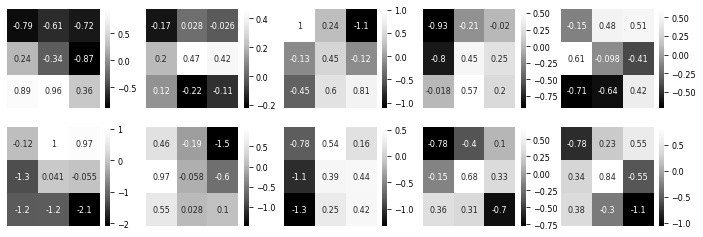

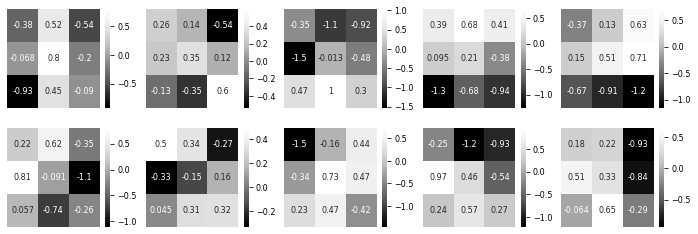

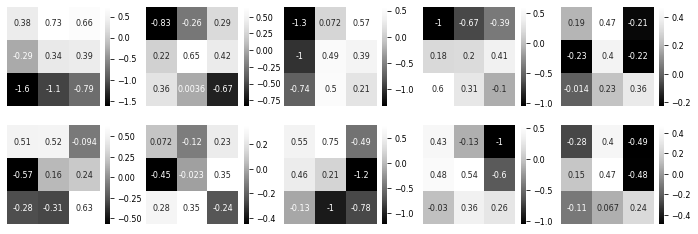

In [239]:
def show_weights_10_layer1(model):

    plt.rcParams['font.size']='8'

    plt.figure(figsize=(12,4))
    w,b=model.layers[0].get_weights()
    for i in range(10):
        plt.subplot(2,5,i+1)
        sns.heatmap(w[:,:,0,i],cmap='Greys_r',annot=True)
        plt.xticks([])
        plt.yticks([])
    
show_weights_10_layer1(models_1l['10_10'])
show_weights_10_layer1(models_1l['10_20'])
show_weights_10_layer1(models_1l['10_50'])

In [292]:
def get_layer_model(cnn,layer=1):

    outputs = [cnn.layers[i].output for i in range(layer)]
    l = Model(inputs=cnn.inputs, outputs=outputs)
    #l.summary()
    
    return l

def show_featuremap_10_layer(model,x,layer=1):

    l1=get_layer_model(model,layer=layer)
    if layer==1:
        lout=l1.predict(np.expand_dims(x,axis=0))
    else:
        lout=l1.predict(np.expand_dims(x,axis=0))
        lout=lout[-1]
        
    plt.figure(figsize=(12,4))
    for i in range(10):
        plt.subplot(2,5,i+1)
        sns.heatmap(lout[0,:,:,i],cmap='Greys_r',annot=False)
        plt.xticks([])
        plt.yticks([])

def show_featuremap_20_layer(model,x,layer=1):

    l1=get_layer_model(model,layer=layer)
    if layer==1:
        lout=l1.predict(np.expand_dims(x,axis=0))
    else:
        lout=l1.predict(np.expand_dims(x,axis=0))
        lout=lout[-1]
        
    plt.figure(figsize=(12,8))
    for i in range(20):
        plt.subplot(4,5,i+1)
        sns.heatmap(lout[0,:,:,i],cmap='Greys_r',annot=False)
        plt.xticks([])
        plt.yticks([])

In [290]:
for i in range(100):
    if np.argmax(y_test[i]) in [9]:
        print(i)

7
9
12
16
20
58
62
73
78
92
99


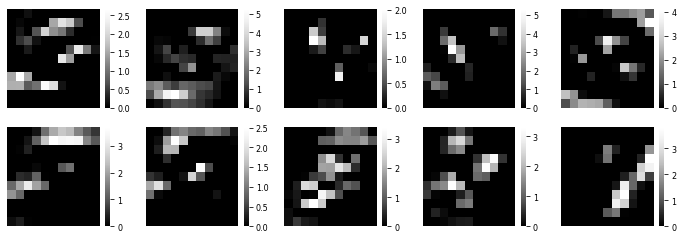

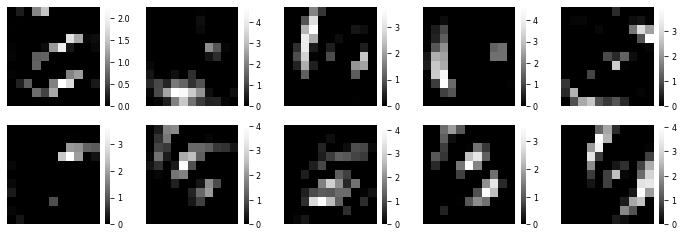

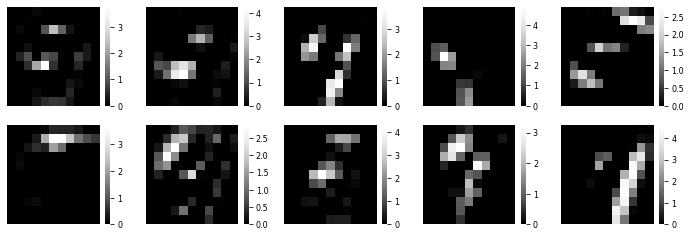

In [295]:
show_featuremap_10_layer(models_2l['10_10'],x_test[61,:,:,:],layer=3)
show_featuremap_10_layer(models_2l['10_10'],x_test[11,:,:,:],layer=3)
show_featuremap_10_layer(models_2l['10_10'],x_test[12,:,:,:],layer=3)

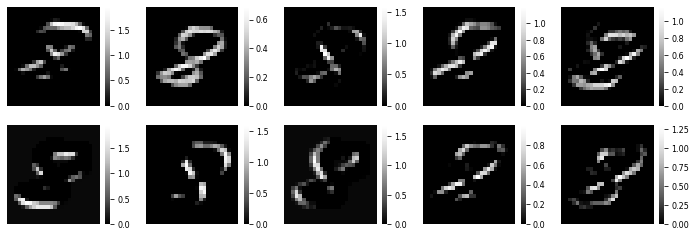

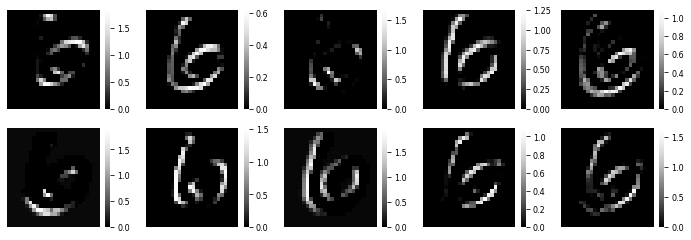

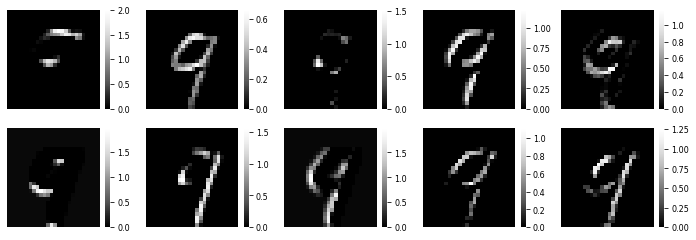

In [293]:
show_featuremap_10_layer(models_1l['10_10'],x_test[61,:,:,:],layer=1)
show_featuremap_10_layer(models_1l['10_10'],x_test[11,:,:,:],layer=1)
show_featuremap_10_layer(models_1l['10_10'],x_test[12,:,:,:],layer=1)

Model: "model_82"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_132_input (InputLaye  [(None, 28, 28, 1)]      0         
 r)                                                              
                                                                 
 conv2d_132 (Conv2D)         (None, 26, 26, 20)        200       
                                                                 
Total params: 200
Trainable params: 200
Non-trainable params: 0
_________________________________________________________________
Model: "model_83"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_132_input (InputLaye  [(None, 28, 28, 1)]      0         
 r)                                                              
                                                                 
 conv2d_132 (Conv2D)         (None, 26, 26

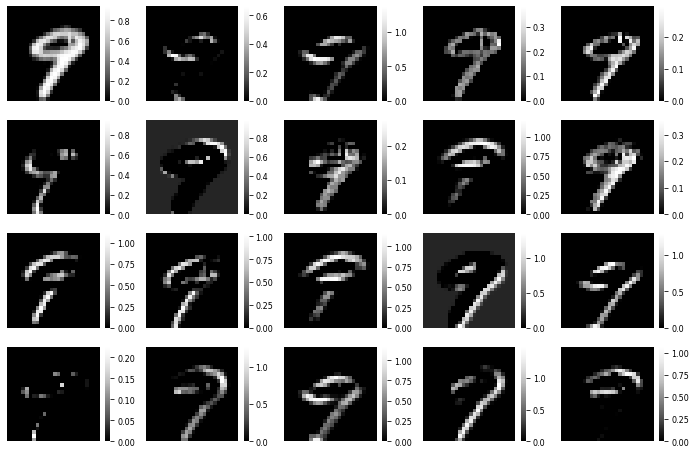

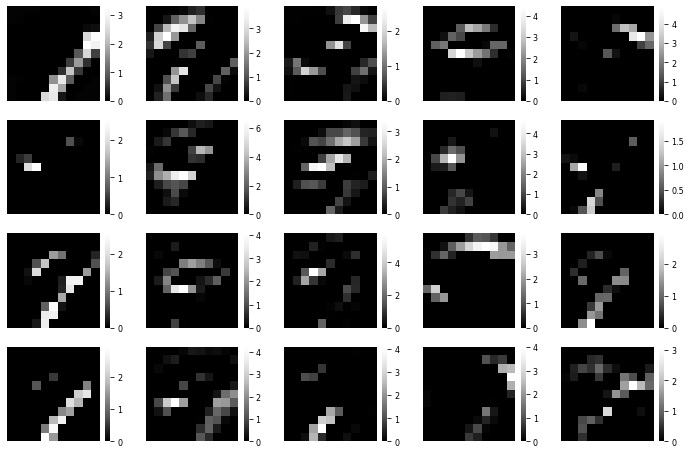

In [278]:
show_featuremap_20_layer(models_2l['20_10'],x_test[9,:,:,:],layer=1)
show_featuremap_20_layer(models_2l['20_10'],x_test[9,:,:,:],layer=3)

Model: "model_80"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_132_input (InputLaye  [(None, 28, 28, 1)]      0         
 r)                                                              
                                                                 
 conv2d_132 (Conv2D)         (None, 26, 26, 20)        200       
                                                                 
Total params: 200
Trainable params: 200
Non-trainable params: 0
_________________________________________________________________
Model: "model_81"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_132_input (InputLaye  [(None, 28, 28, 1)]      0         
 r)                                                              
                                                                 
 conv2d_132 (Conv2D)         (None, 26, 26

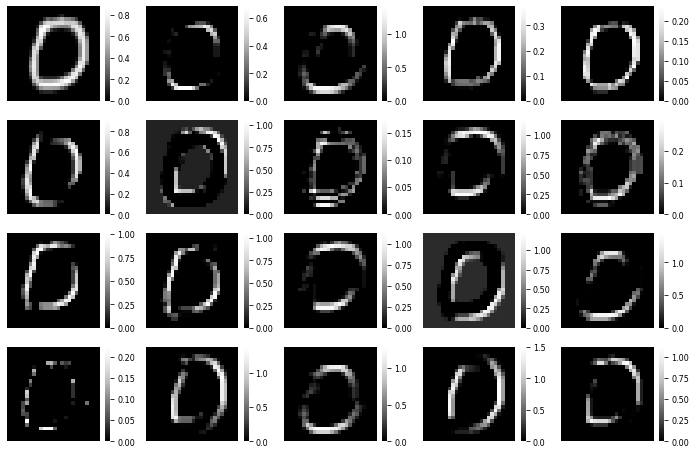

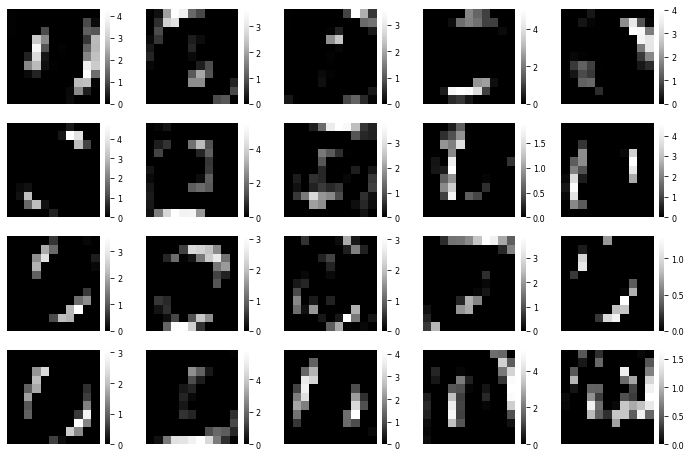

In [277]:
show_featuremap_20_layer(models_2l['20_10'],x_test[10,:,:,:],layer=1)
show_featuremap_20_layer(models_2l['20_10'],x_test[10,:,:,:],layer=3)

Model: "model_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_126_input (InputLaye  [(None, 28, 28, 1)]      0         
 r)                                                              
                                                                 
 conv2d_126 (Conv2D)         (None, 26, 26, 10)        100       
                                                                 
Total params: 100
Trainable params: 100
Non-trainable params: 0
_________________________________________________________________
Model: "model_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_126_input (InputLaye  [(None, 28, 28, 1)]      0         
 r)                                                              
                                                                 
 conv2d_126 (Conv2D)         (None, 26, 26

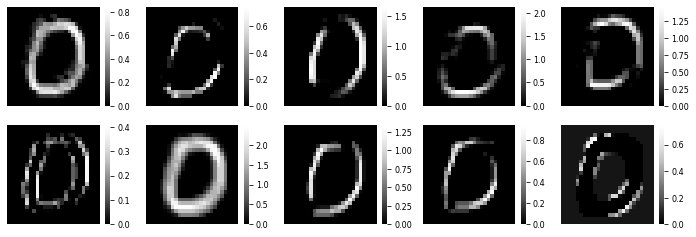

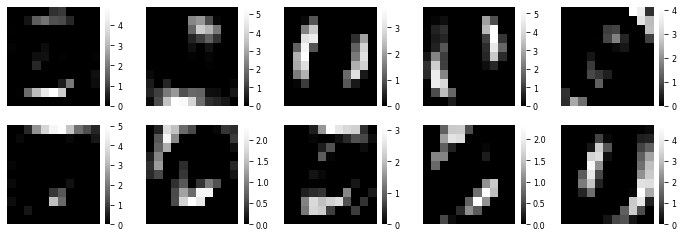

In [268]:
show_featuremap_10_layer(models_2l['10_10'],x_test[10,:,:,:],layer=1)
show_featuremap_10_layer(models_2l['10_10'],x_test[10,:,:,:],layer=3)

Model: "model_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_126_input (InputLaye  [(None, 28, 28, 1)]      0         
 r)                                                              
                                                                 
 conv2d_126 (Conv2D)         (None, 26, 26, 10)        100       
                                                                 
Total params: 100
Trainable params: 100
Non-trainable params: 0
_________________________________________________________________
Model: "model_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_126_input (InputLaye  [(None, 28, 28, 1)]      0         
 r)                                                              
                                                                 
 conv2d_126 (Conv2D)         (None, 26, 26

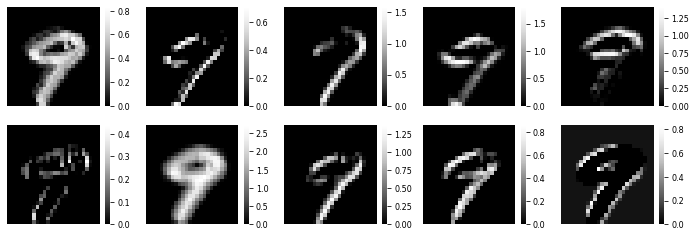

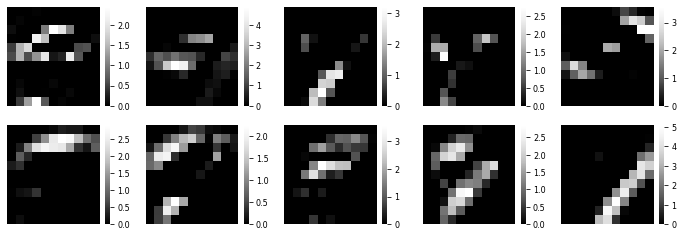

In [267]:
show_featuremap_10_layer(models_2l['10_10'],x_test[9,:,:,:],layer=1)
show_featuremap_10_layer(models_2l['10_10'],x_test[9,:,:,:],layer=3)

Model: "model_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_126_input (InputLaye  [(None, 28, 28, 1)]      0         
 r)                                                              
                                                                 
 conv2d_126 (Conv2D)         (None, 26, 26, 10)        100       
                                                                 
Total params: 100
Trainable params: 100
Non-trainable params: 0
_________________________________________________________________
Model: "model_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_126_input (InputLaye  [(None, 28, 28, 1)]      0         
 r)                                                              
                                                                 
 conv2d_126 (Conv2D)         (None, 26, 26

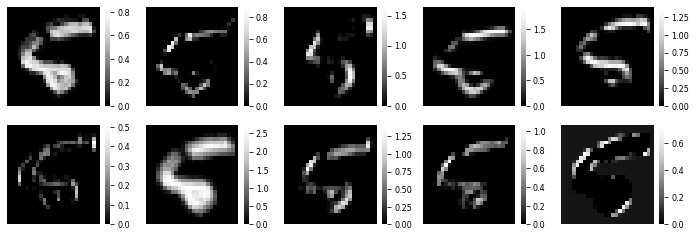

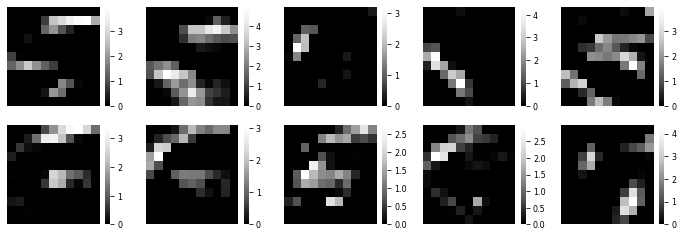

In [266]:
show_featuremap_10_layer(models_2l['10_10'],x_test[8,:,:,:],layer=1)
show_featuremap_10_layer(models_2l['10_10'],x_test[8,:,:,:],layer=3)

Model: "model_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_126_input (InputLaye  [(None, 28, 28, 1)]      0         
 r)                                                              
                                                                 
 conv2d_126 (Conv2D)         (None, 26, 26, 10)        100       
                                                                 
Total params: 100
Trainable params: 100
Non-trainable params: 0
_________________________________________________________________
Model: "model_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_126_input (InputLaye  [(None, 28, 28, 1)]      0         
 r)                                                              
                                                                 
 conv2d_126 (Conv2D)         (None, 26, 26

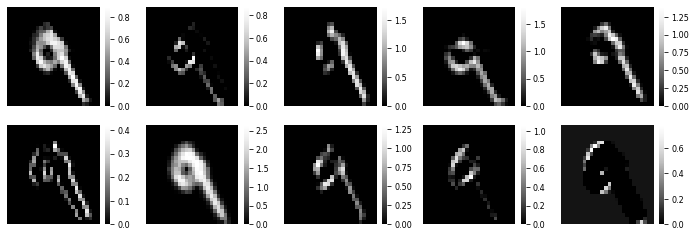

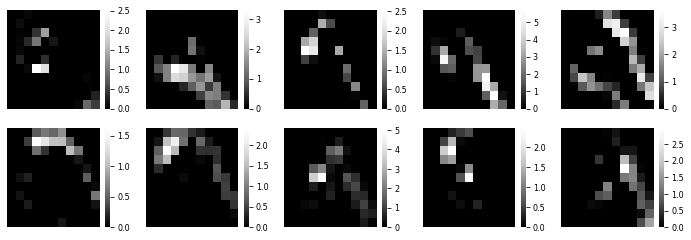

In [265]:
show_featuremap_10_layer(models_2l['10_10'],x_test[7,:,:,:],layer=1)
show_featuremap_10_layer(models_2l['10_10'],x_test[7,:,:,:],layer=3)

Model: "model_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_126_input (InputLaye  [(None, 28, 28, 1)]      0         
 r)                                                              
                                                                 
 conv2d_126 (Conv2D)         (None, 26, 26, 10)        100       
                                                                 
Total params: 100
Trainable params: 100
Non-trainable params: 0
_________________________________________________________________
Model: "model_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_126_input (InputLaye  [(None, 28, 28, 1)]      0         
 r)                                                              
                                                                 
 conv2d_126 (Conv2D)         (None, 26, 26

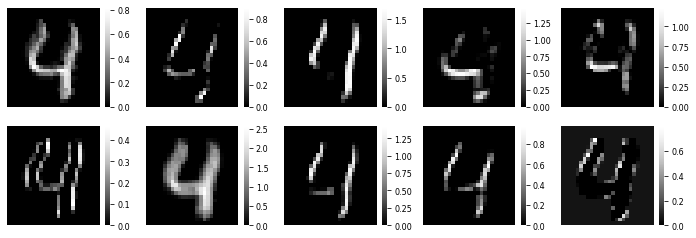

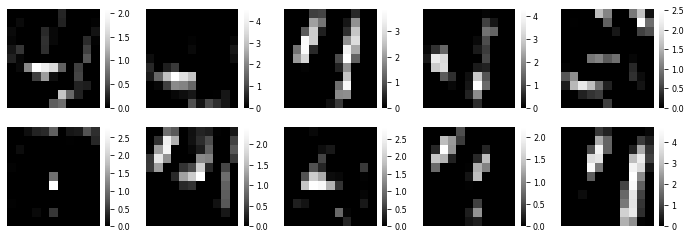

In [262]:
show_featuremap_10_layer(models_2l['10_10'],x_test[4,:,:,:],layer=1)
show_featuremap_10_layer(models_2l['10_10'],x_test[4,:,:,:],layer=3)

Model: "model_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_126_input (InputLaye  [(None, 28, 28, 1)]      0         
 r)                                                              
                                                                 
 conv2d_126 (Conv2D)         (None, 26, 26, 10)        100       
                                                                 
Total params: 100
Trainable params: 100
Non-trainable params: 0
_________________________________________________________________
Model: "model_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_126_input (InputLaye  [(None, 28, 28, 1)]      0         
 r)                                                              
                                                                 
 conv2d_126 (Conv2D)         (None, 26, 26

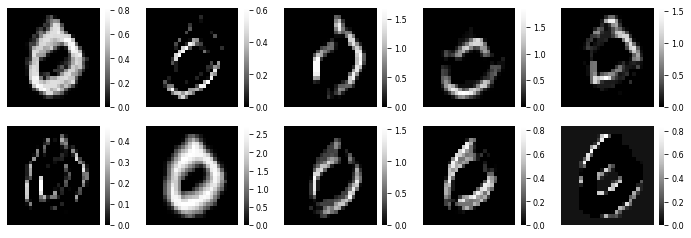

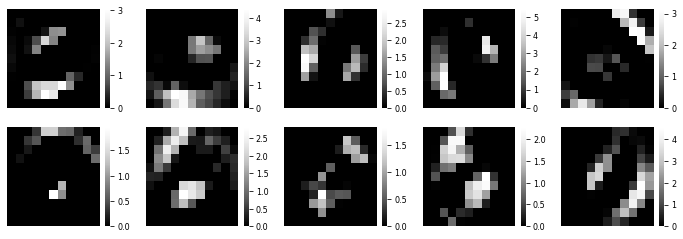

In [261]:
show_featuremap_10_layer(models_2l['10_10'],x_test[3,:,:,:],layer=1)
show_featuremap_10_layer(models_2l['10_10'],x_test[3,:,:,:],layer=3)

Model: "model_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_126_input (InputLaye  [(None, 28, 28, 1)]      0         
 r)                                                              
                                                                 
 conv2d_126 (Conv2D)         (None, 26, 26, 10)        100       
                                                                 
Total params: 100
Trainable params: 100
Non-trainable params: 0
_________________________________________________________________
Model: "model_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_126_input (InputLaye  [(None, 28, 28, 1)]      0         
 r)                                                              
                                                                 
 conv2d_126 (Conv2D)         (None, 26, 26

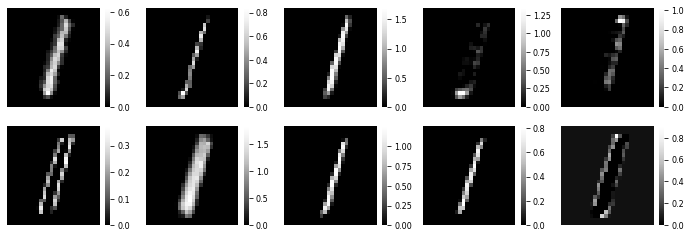

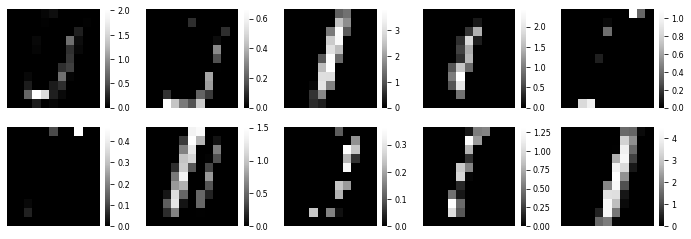

In [260]:
show_featuremap_10_layer(models_2l['10_10'],x_test[2,:,:,:],layer=1)
show_featuremap_10_layer(models_2l['10_10'],x_test[2,:,:,:],layer=3)

Model: "model_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_126_input (InputLaye  [(None, 28, 28, 1)]      0         
 r)                                                              
                                                                 
 conv2d_126 (Conv2D)         (None, 26, 26, 10)        100       
                                                                 
Total params: 100
Trainable params: 100
Non-trainable params: 0
_________________________________________________________________
Model: "model_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_126_input (InputLaye  [(None, 28, 28, 1)]      0         
 r)                                                              
                                                                 
 conv2d_126 (Conv2D)         (None, 26, 26

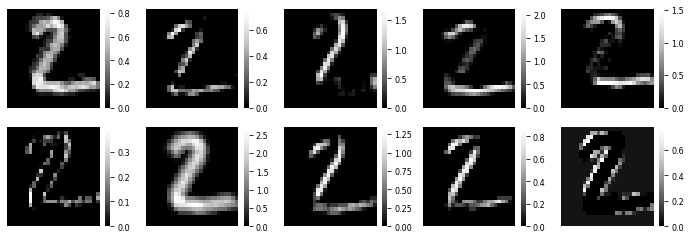

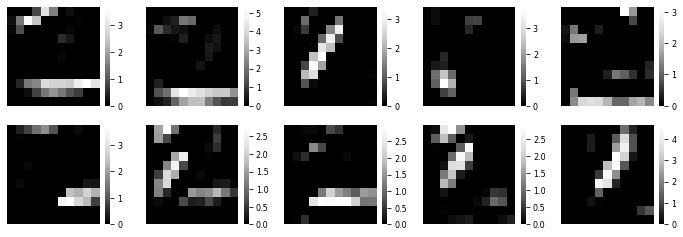

In [259]:
show_featuremap_10_layer(models_2l['10_10'],x_test[1,:,:,:],layer=1)
show_featuremap_10_layer(models_2l['10_10'],x_test[1,:,:,:],layer=3)

Model: "model_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_126_input (InputLaye  [(None, 28, 28, 1)]      0         
 r)                                                              
                                                                 
 conv2d_126 (Conv2D)         (None, 26, 26, 10)        100       
                                                                 
Total params: 100
Trainable params: 100
Non-trainable params: 0
_________________________________________________________________
Model: "model_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_126_input (InputLaye  [(None, 28, 28, 1)]      0         
 r)                                                              
                                                                 
 conv2d_126 (Conv2D)         (None, 26, 26

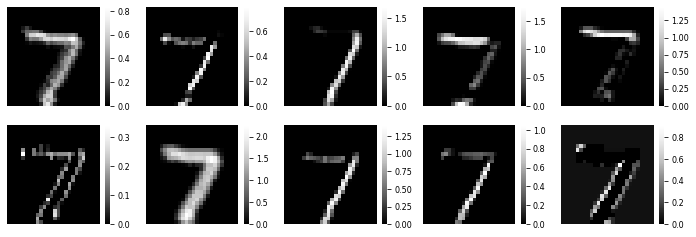

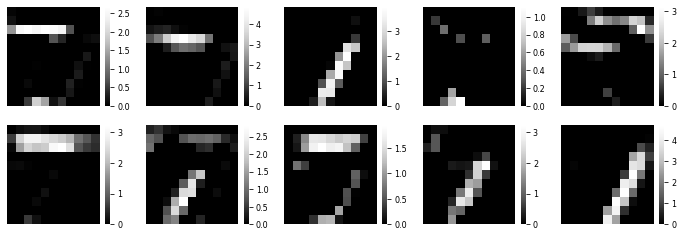

In [258]:
show_featuremap_10_layer(models_2l['10_10'],x_test[0,:,:,:],layer=1)
show_featuremap_10_layer(models_2l['10_10'],x_test[0,:,:,:],layer=3)

Model: "model_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_116_input (InputLaye  [(None, 28, 28, 1)]      0         
 r)                                                              
                                                                 
 conv2d_116 (Conv2D)         (None, 26, 26, 10)        100       
                                                                 
 max_pooling2d_116 (MaxPooli  (None, 13, 13, 10)       0         
 ng2D)                                                           
                                                                 
Total params: 100
Trainable params: 100
Non-trainable params: 0
_________________________________________________________________
Model: "model_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_117_input (InputLaye  [(None, 28, 

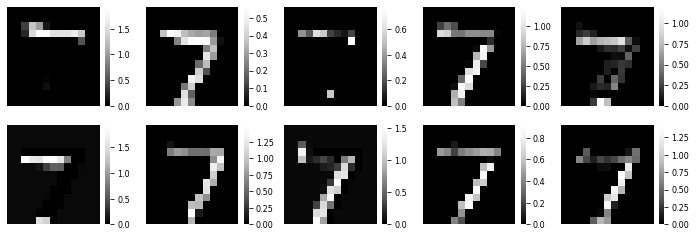

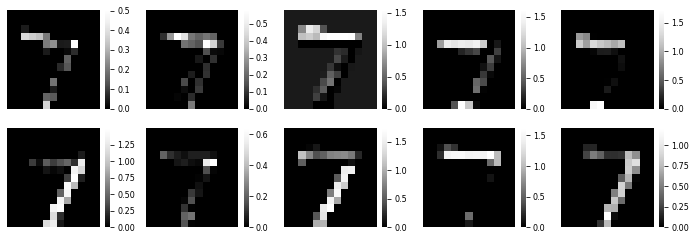

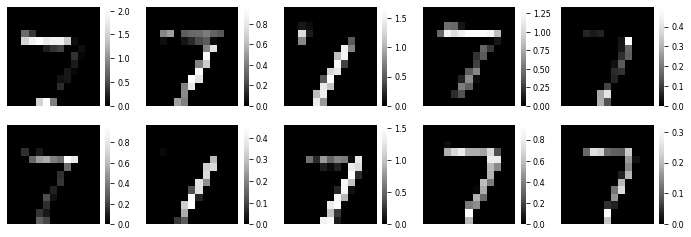

In [255]:
show_featuremap_10_layer(models_1l['10_10'],x_test[0,:,:,:],layer=2)
show_featuremap_10_layer(models_1l['10_20'],x_test[0,:,:,:],layer=2)
show_featuremap_10_layer(models_1l['10_50'],x_test[0,:,:,:],layer=2)

Model: "model_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_116_input (InputLaye  [(None, 28, 28, 1)]      0         
 r)                                                              
                                                                 
 conv2d_116 (Conv2D)         (None, 26, 26, 10)        100       
                                                                 
Total params: 100
Trainable params: 100
Non-trainable params: 0
_________________________________________________________________
Model: "model_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_117_input (InputLaye  [(None, 28, 28, 1)]      0         
 r)                                                              
                                                                 
 conv2d_117 (Conv2D)         (None, 26, 26

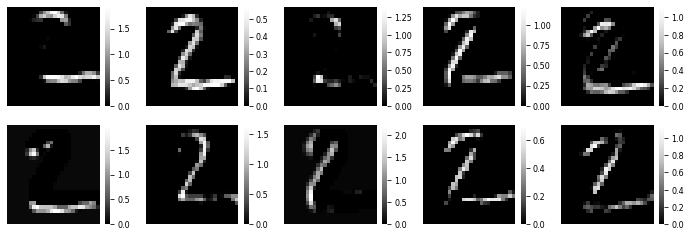

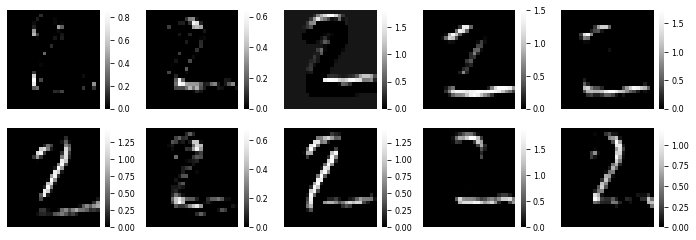

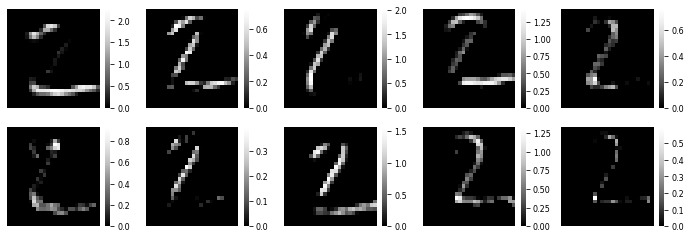

In [253]:
show_featuremap_10_layer(models_1l['10_10'],x_test[1,:,:,:])
show_featuremap_10_layer(models_1l['10_20'],x_test[1,:,:,:])
show_featuremap_10_layer(models_1l['10_50'],x_test[1,:,:,:])

In [226]:
models_2l

{'10_10': <keras.engine.sequential.Sequential at 0x2bc210940>,
 '10_20': <keras.engine.sequential.Sequential at 0x2bc259070>,
 '10_50': <keras.engine.sequential.Sequential at 0x2bc266ca0>,
 '20_10': <keras.engine.sequential.Sequential at 0x2bcd32970>,
 '20_20': <keras.engine.sequential.Sequential at 0x2bc349c70>,
 '20_50': <keras.engine.sequential.Sequential at 0x2be31bc70>,
 '50_10': <keras.engine.sequential.Sequential at 0x2cb490d30>,
 '50_20': <keras.engine.sequential.Sequential at 0x2ccd51fd0>,
 '50_50': <keras.engine.sequential.Sequential at 0x2cf682280>}

In [227]:
models_2l['10_10'].summary()

Model: "sequential_90"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_126 (Conv2D)         (None, 26, 26, 10)        100       
                                                                 
 max_pooling2d_126 (MaxPooli  (None, 13, 13, 10)       0         
 ng2D)                                                           
                                                                 
 conv2d_127 (Conv2D)         (None, 11, 11, 10)        910       
                                                                 
 max_pooling2d_127 (MaxPooli  (None, 5, 5, 10)         0         
 ng2D)                                                           
                                                                 
 flatten_88 (Flatten)        (None, 250)               0         
                                                                 
 dense_176 (Dense)           (None, 10)              

In [229]:
l2=get_layer_model(models_2l['10_10'],layer=2)

Model: "model_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_126_input (InputLaye  [(None, 28, 28, 1)]      0         
 r)                                                              
                                                                 
 conv2d_126 (Conv2D)         (None, 26, 26, 10)        100       
                                                                 
 max_pooling2d_126 (MaxPooli  (None, 13, 13, 10)       0         
 ng2D)                                                           
                                                                 
Total params: 100
Trainable params: 100
Non-trainable params: 0
_________________________________________________________________


In [234]:
models_1l['10_10'].summary()
models_1l['10_20'].summary()
models_1l['10_50'].summary()

models_1l['20_10'].summary()
models_1l['20_20'].summary()
models_1l['20_50'].summary()

models_1l['50_10'].summary()
models_1l['50_20'].summary()
models_1l['50_50'].summary()

Model: "sequential_80"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_116 (Conv2D)         (None, 26, 26, 10)        100       
                                                                 
 max_pooling2d_116 (MaxPooli  (None, 13, 13, 10)       0         
 ng2D)                                                           
                                                                 
 flatten_79 (Flatten)        (None, 1690)              0         
                                                                 
 dense_158 (Dense)           (None, 10)                16910     
                                                                 
 dense_159 (Dense)           (None, 10)                110       
                                                                 
Total params: 17,120
Trainable params: 17,120
Non-trainable params: 0
_________________________________________________

In [297]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))